## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.97

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 1s 4ms/step - loss: 2.1549 - accu

Epoch 1/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9427 - accuracy: 0.2934 - val_loss: 1.7728 - val_accuracy: 0.3665
Epoch 2/50
196/196 [==============================] - 1s 3ms/step - loss: 1.7082 - accuracy: 0.3881 - val_loss: 1.6315 - val_accuracy: 0.4232
Epoch 3/50
196/196 [==============================] - 1s 3ms/step - loss: 1.6276 - accuracy: 0.4164 - val_loss: 1.6124 - val_accuracy: 0.4297
Epoch 4/50
196/196 [==============================] - 1s 3ms/step - loss: 1.5921 - accuracy: 0.4305 - val_loss: 1.5317 - val_accuracy: 0.4523
Epoch 5/50
196/196 [==============================] - 1s 3ms/step - loss: 1.5214 - accuracy: 0.4548 - val_loss: 1.5263 - val_accuracy: 0.4530
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 1.4969 - accuracy: 0.4614 - val_loss: 1.4773 - val_accuracy: 0.4719
Epoch 7/50
196/196 [==============================] - 1s 3ms/step - loss: 1.4502 - accuracy: 0.4823 - val_loss: 1.4684 - val_accuracy: 0.4731
Epoch 

196/196 [==============================] - 1s 5ms/step - loss: 2.0238 - accuracy: 0.2697 - val_loss: 1.8667 - val_accuracy: 0.3251
Epoch 2/50
196/196 [==============================] - 1s 4ms/step - loss: 1.7843 - accuracy: 0.3668 - val_loss: 1.7250 - val_accuracy: 0.3857
Epoch 3/50
196/196 [==============================] - 1s 3ms/step - loss: 1.6851 - accuracy: 0.4042 - val_loss: 1.6700 - val_accuracy: 0.4031
Epoch 4/50
196/196 [==============================] - 1s 4ms/step - loss: 1.6247 - accuracy: 0.4239 - val_loss: 1.6278 - val_accuracy: 0.4261
Epoch 5/50
196/196 [==============================] - 1s 3ms/step - loss: 1.5770 - accuracy: 0.4427 - val_loss: 1.5590 - val_accuracy: 0.4454
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5418 - accuracy: 0.4565 - val_loss: 1.5180 - val_accuracy: 0.4657
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 1.4952 - accuracy: 0.4704 - val_loss: 1.4910 - val_accuracy: 0.4712
Epoch 8/50
196/19

196/196 [==============================] - 1s 4ms/step - loss: 2.2220 - accuracy: 0.1846 - val_loss: 2.1251 - val_accuracy: 0.2512
Epoch 2/50
196/196 [==============================] - 1s 3ms/step - loss: 2.0613 - accuracy: 0.2828 - val_loss: 2.0069 - val_accuracy: 0.3006
Epoch 3/50
196/196 [==============================] - 1s 3ms/step - loss: 1.9698 - accuracy: 0.3111 - val_loss: 1.9356 - val_accuracy: 0.3219
Epoch 4/50
196/196 [==============================] - 1s 3ms/step - loss: 1.9113 - accuracy: 0.3302 - val_loss: 1.8886 - val_accuracy: 0.3408
Epoch 5/50
196/196 [==============================] - 1s 3ms/step - loss: 1.8714 - accuracy: 0.3465 - val_loss: 1.8573 - val_accuracy: 0.3516
Epoch 6/50
196/196 [==============================] - 1s 3ms/step - loss: 1.8428 - accuracy: 0.3566 - val_loss: 1.8338 - val_accuracy: 0.3630
Epoch 7/50
196/196 [==============================] - 1s 3ms/step - loss: 1.8191 - accuracy: 0.3647 - val_loss: 1.8121 - val_accuracy: 0.3718
Epoch 8/50
196/19

196/196 [==============================] - 1s 4ms/step - loss: 2.3034 - accuracy: 0.1232 - val_loss: 2.2722 - val_accuracy: 0.1488
Epoch 2/50
196/196 [==============================] - 1s 3ms/step - loss: 2.2554 - accuracy: 0.1620 - val_loss: 2.2400 - val_accuracy: 0.1695
Epoch 3/50
196/196 [==============================] - 1s 3ms/step - loss: 2.2268 - accuracy: 0.1827 - val_loss: 2.2138 - val_accuracy: 0.1874
Epoch 4/50
196/196 [==============================] - 1s 3ms/step - loss: 2.2027 - accuracy: 0.2020 - val_loss: 2.1914 - val_accuracy: 0.2047
Epoch 5/50
196/196 [==============================] - 1s 3ms/step - loss: 2.1815 - accuracy: 0.2154 - val_loss: 2.1715 - val_accuracy: 0.2223
Epoch 6/50
196/196 [==============================] - 1s 3ms/step - loss: 2.1624 - accuracy: 0.2300 - val_loss: 2.1532 - val_accuracy: 0.2320
Epoch 7/50
196/196 [==============================] - 1s 3ms/step - loss: 2.1449 - accuracy: 0.2392 - val_loss: 2.1363 - val_accuracy: 0.2414
Epoch 8/50
196/19

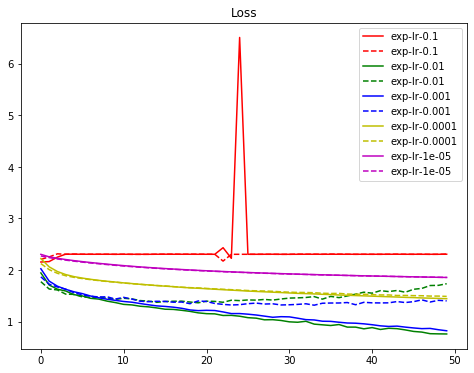

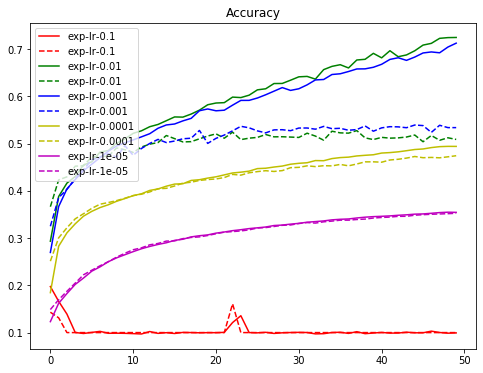

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()